In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pickle
import sklearn.metrics as metrics

In [3]:
with open("../../outputs/cr_investigations/pt200_akt02_regmass_argmin.pkl", "rb") as f:
#with open("../../outputs/mseries/mseries.pkl", "rb") as f:
    vars = pickle.load(f)

In [3]:
#n4 handling
with open("../../outputs/n4/hgg_n4.pkl", "rb") as f:
    hgg_n4 = pickle.load(f)
with open("../../outputs/n4/hbb_n4.pkl", "rb") as f:
    hbb_n4 = pickle.load(f)
with open("../../outputs/n4/q347_n4.pkl", "rb") as f:
    q347_n4 = pickle.load(f)
with open("../../outputs/n4/q476_n4.pkl", "rb") as f:
    q476_n4 = pickle.load(f)
with open("../../outputs/n4/q68_n4.pkl", "rb") as f:
    q68_n4 = pickle.load(f)
with open("../../outputs/n4/q810_n4.pkl", "rb") as f:
    q810_n4 = pickle.load(f)
with open("../../outputs/n4/q1014_n4.pkl", "rb") as f:
    q1014_n4 = pickle.load(f)
with open("../../outputs/n4/q1418_n4.pkl", "rb") as f:
    q1418_n4 = pickle.load(f)
with open("../../outputs/n4/q1824_n4.pkl", "rb") as f:
    q1824_n4 = pickle.load(f)
with open("../../outputs/n4/q2432_n4.pkl", "rb") as f:
    q2432_n4 = pickle.load(f)
with open("../../outputs/n4/q32inf_n4.pkl", "rb") as f:
    q32inf_n4 = pickle.load(f)
with open("../../outputs/n4/n2_n3_d2_d3.pkl", "rb") as f:
    ecfs = pickle.load(f)

In [4]:
hgg = vars[0]['Hgg']['Hgg']
hbb = vars[0]['Hbb']['Hbb']

#n4
# hgg['N4'] = hgg_n4[0]['Hgg']['Hgg']['N4']
# hbb['N4'] = hbb_n4[0]['Hbb']['Hbb']['N4']

In [5]:
#signal scale factors
scalesHJ = ((44.99*(0.471*1000)*0.0817)/(hgg['entries']))
scalesHbb = ((44.99*(0.274*1000)*0.581)/(hbb['entries']))

In [6]:
#do the scaling 
hgg_entries = list(hgg.keys())
for i in range(1, len(hgg_entries)):
    hgg[hgg_entries[i]].view(flow=True)[:] *= scalesHJ

hbb_entries = list(hgg.keys())
for i in range(1, len(hbb_entries)):
    hbb[hbb_entries[i]].view(flow=True)[:] *= scalesHbb

In [7]:
#get the totals for each histogram
hgg_totals_dict = {}
for i in range(1, len(hgg_entries)):
    hgg_totals_dict[hgg_entries[i]] = hgg[hgg_entries[i]][0:len(hgg[hgg_entries[i]].view()):sum]

hbb_totals_dict = {}
for i in range(1, len(hbb_entries)):
    hbb_totals_dict[hbb_entries[i]] = hbb[hbb_entries[i]][0:len(hbb[hbb_entries[i]].view()):sum]

In [8]:
#get the true positive fractions
hgg_truth_dict = {}
for i in range(1, len(hgg_entries)):
    temp_list = []
    for j in range(1, len(hgg[hgg_entries[i]].view())+1):
        temp_list.append(hgg[hgg_entries[i]][0:j:sum].value/hgg_totals_dict[hgg_entries[i]].value)
    hgg_truth_dict[hgg_entries[i]] = temp_list

hbb_truth_dict = {}
for i in range(1, len(hbb_entries)):
    temp_list = []
    for j in range(1, len(hbb[hbb_entries[i]].view())+1):
        temp_list.append(hbb[hbb_entries[i]][0:j:sum].value/hbb_totals_dict[hbb_entries[i]].value)
    hbb_truth_dict[hbb_entries[i]] = temp_list

In [9]:
#2017 integrated luminosity and QCD cross sections
IL = 44.99
xs_300to470 = 6833
xs_470to600 = 549.5
xs_600to800 = 156.5
xs_800to1000 = 26.22
xs_1000to1400 = 7.475
xs_1400to1800 = 0.6482
xs_1800to2400 = 0.08742
xs_2400to3200 = 0.005237
xs_3200toInf = 0.0001353

In [10]:
#combine the qcds into a dictionary
qcd_dict = {}
qcd_dict['q347'] = vars[0]['QCD_Pt_300to470_TuneCP5_13TeV_pythia8']['QCD_Pt_300to470']
qcd_dict['q476'] = vars[0]['QCD_Pt_470to600_TuneCP5_13TeV_pythia8']['QCD_Pt_470to600']
qcd_dict['q68'] = vars[0]['QCD_Pt_600to800_TuneCP5_13TeV_pythia8']['QCD_Pt_600to800']
qcd_dict['q810'] = vars[0]['QCD_Pt_800to1000_TuneCP5_13TeV_pythia8']['QCD_Pt_800to1000']
qcd_dict['q1014'] = vars[0]['QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8']['QCD_Pt_1000to1400']
qcd_dict['q1418'] = vars[0]['QCD_Pt_1400to1800_TuneCP5_13TeV_pythia8']['QCD_Pt_1400to1800']
qcd_dict['q1824'] = vars[0]['QCD_Pt_1800to2400_TuneCP5_13TeV_pythia8']['QCD_Pt_1800to2400']
qcd_dict['q2432'] = vars[0]['QCD_Pt_2400to3200_TuneCP5_13TeV_pythia8']['QCD_Pt_2400to3200']
qcd_dict['q32inf'] = vars[0]['QCD_Pt_3200toInf_TuneCP5_13TeV_pythia8']['QCD_Pt_3200toInf']

#n4
# qcd_dict['q347']['N4'] = q347_n4[0]['QCD_Pt_300to470_TuneCP5_13TeV_pythia8']['QCD_Pt_300to470']['N4']
# qcd_dict['q476']['N4'] = q476_n4[0]['QCD_Pt_470to600_TuneCP5_13TeV_pythia8']['QCD_Pt_470to600']['N4']
# qcd_dict['q68']['N4'] = q68_n4[0]['QCD_Pt_600to800_TuneCP5_13TeV_pythia8']['QCD_Pt_600to800']['N4']
# qcd_dict['q810']['N4'] = q810_n4[0]['QCD_Pt_800to1000_TuneCP5_13TeV_pythia8']['QCD_Pt_800to1000']['N4']
# qcd_dict['q1014']['N4'] = q1014_n4[0]['QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8']['QCD_Pt_1000to1400']['N4']
# qcd_dict['q1418']['N4'] = q1418_n4[0]['QCD_Pt_1400to1800_TuneCP5_13TeV_pythia8']['QCD_Pt_1400to1800']['N4']
# qcd_dict['q1824']['N4'] = q1824_n4[0]['QCD_Pt_1800to2400_TuneCP5_13TeV_pythia8']['QCD_Pt_1800to2400']['N4']
# qcd_dict['q2432']['N4'] = q2432_n4[0]['QCD_Pt_2400to3200_TuneCP5_13TeV_pythia8']['QCD_Pt_2400to3200']['N4']
# qcd_dict['q32inf']['N4'] = q32inf_n4[0]['QCD_Pt_3200toInf_TuneCP5_13TeV_pythia8']['QCD_Pt_3200toInf']['N4']

In [11]:
#QCD scale factors dictionary
qcd_sf_dict = {}
qcd_sf_dict['scales300to470'] = (((xs_300to470*1000)*IL)/(qcd_dict['q347']['entries']))
qcd_sf_dict['scales470to600'] = (((xs_470to600*1000)*IL)/(qcd_dict['q476']['entries']))
qcd_sf_dict['scales600to800'] = (((xs_600to800*1000)*IL)/(qcd_dict['q68']['entries']))
qcd_sf_dict['scales800to1000'] = (((xs_800to1000*1000)*IL)/(qcd_dict['q810']['entries']))
qcd_sf_dict['scales1000to1400'] = (((xs_1000to1400*1000)*IL)/(qcd_dict['q1014']['entries']))
qcd_sf_dict['scales1400to1800'] = (((xs_1400to1800*1000)*IL)/(qcd_dict['q1418']['entries']))
qcd_sf_dict['scales1800to2400'] = (((xs_1800to2400*1000)*IL)/(qcd_dict['q1824']['entries']))
qcd_sf_dict['scales2400to3200'] = (((xs_2400to3200*1000)*IL)/(qcd_dict['q2432']['entries']))
qcd_sf_dict['scales3200toInf'] = (((xs_3200toInf*1000)*IL)/(qcd_dict['q32inf']['entries']))

In [12]:
#scale all the qcd values
entries = list(qcd_dict['q347'].keys())
for i in range(0, len(qcd_dict)):
    qcd_range = list(qcd_dict.keys())[i]
    qcd_scales = list(qcd_sf_dict.keys())[i]
    for j in range(1, len(entries)):
        qcd_dict[qcd_range][entries[j]].view(flow=True)[:] *= qcd_sf_dict[qcd_scales]

In [13]:
#combine the qcds into individual variable fields
qcd_vars = {}
for i in range(1, len(entries)):
    temp_hist = qcd_dict['q347'][entries[i]]
    for j in range(1, len(qcd_dict)):
        temp_hist += qcd_dict[list(qcd_dict.keys())[j]][entries[i]]
    qcd_vars[entries[i]] = temp_hist

In [14]:
#totals for each qcd hist
qcd_totals_dict = {}
for i in range(1, len(entries)):
    qcd_totals_dict[entries[i]] = qcd_vars[entries[i]][0:len(qcd_vars[entries[i]].view()):sum]

In [15]:
#false positive fractions for each qcd variable
qcd_false_positive_dict = {}
for i in range(1, len(entries)):
    temp_list = []
    for j in range(1, len(qcd_vars[entries[i]].view())+1):
        temp_list.append(qcd_vars[entries[i]][0:j:sum].value/qcd_totals_dict[entries[i]].value)
    qcd_false_positive_dict[entries[i]] = temp_list

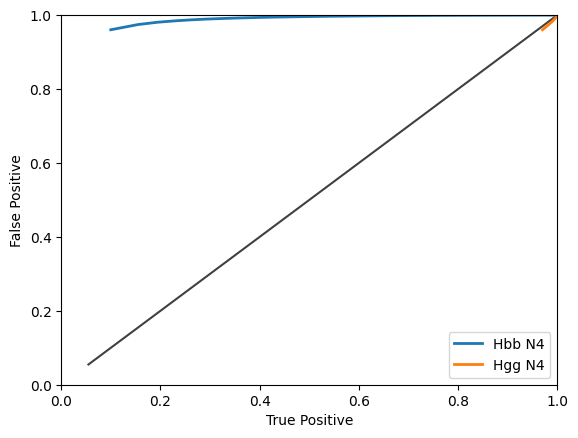

In [21]:
fig, ax = plt.subplots()

ax.plot(hbb_truth_dict['Btag'], qcd_false_positive_dict['Btag'], linewidth=2.0, label='Hbb N4')
ax.plot(hgg_truth_dict['Btag'], qcd_false_positive_dict['Btag'], linewidth=2.0, label='Hgg N4')

plt.xlabel("True Positive")
plt.ylabel("False Positive")
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()

In [16]:
hgg_auc_dict = {}
for i in range(1, len(hgg_entries)):
    hgg_auc_dict[hgg_entries[i]] = metrics.auc(
                                        hgg_truth_dict[hgg_entries[i]],
                                        qcd_false_positive_dict[hgg_entries[i]]
                                    )
for i in range(1, len(hgg_entries)):
    if hgg_auc_dict[hgg_entries[i]] >= 0.5:
        hgg_auc_dict[hgg_entries[i]] = 1 - hgg_auc_dict[hgg_entries[i]]

In [17]:
hgg_auc_dict

{'Color_Ring': 0.39703278311936113}

In [18]:
hbb_auc_dict = {}
for i in range(1, len(hbb_entries)):
    hbb_auc_dict[hgg_entries[i]] = metrics.auc(
                                        hbb_truth_dict[hbb_entries[i]],
                                        qcd_false_positive_dict[hbb_entries[i]]
                                    )
for i in range(1, len(hbb_entries)):
    if hbb_auc_dict[hbb_entries[i]] >= 0.5:
        hbb_auc_dict[hbb_entries[i]] = 1 - hbb_auc_dict[hbb_entries[i]]

In [19]:
hbb_auc_dict

{'Color_Ring': 0.37732731182161267}

In [27]:
hgg['Btag'].to_numpy()

(array([1.79124979e+02, 2.29976763e+00, 1.02035002e+00, 5.74580082e-01,
        3.49524156e-01, 2.51831069e-01, 2.01175394e-01, 1.36046669e-01,
        1.01311349e-01, 8.39436895e-02, 8.68382995e-02, 6.36814197e-02,
        4.99320222e-02, 3.76299298e-02, 3.32880148e-02, 2.67751424e-02,
        3.18407098e-02, 2.31568799e-02, 1.73676599e-02, 1.73676599e-02,
        1.88149649e-02, 7.96017746e-03, 1.01311349e-02, 6.51287246e-03,
        5.78921997e-03, 7.96017746e-03, 7.23652496e-03, 3.61826248e-03,
        2.17095749e-03, 3.61826248e-03, 2.89460998e-03, 2.17095749e-03,
        4.34191498e-03, 1.44730499e-03, 1.44730499e-03, 7.23652496e-04,
        0.00000000e+00, 1.44730499e-03, 0.00000000e+00, 0.00000000e+00]),
 array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
        0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
        0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0

In [23]:
hbb['Btag']

Hist(Regular(40, 0, 1, underflow=False, overflow=False, name='Btag'), storage=Weight()) # Sum: WeightedSum(value=568.071, variance=8.18633)

In [24]:
qcd_vars['Btag']

Hist(Regular(40, 0, 1, underflow=False, overflow=False, name='Btag'), storage=Weight()) # Sum: WeightedSum(value=2.7561e+07, variance=3.69095e+08)

In [29]:
hgg_truth_dict['Btag']

[0.9702377685969851,
 0.9826945539780969,
 0.988221321563801,
 0.9913335580624174,
 0.9932267699375205,
 0.9945908232139921,
 0.9956804979578401,
 0.9964174003026006,
 0.9969661573678479,
 0.9974208417933385,
 0.9978912049921217,
 0.9982361380045628,
 0.9985065968438632,
 0.9987104208966693,
 0.9988907267895362,
 0.9990357554424943,
 0.999208221948715,
 0.9993336521350572,
 0.9994277247748139,
 0.9995217974145706,
 0.9996237094409737,
 0.9996668260675288,
 0.9997217017740535,
 0.9997569790139622,
 0.9997883365605478,
 0.9998314531871028,
 0.9998706501203347,
 0.9998902485869506,
 0.9999020076669203,
 0.9999216061335362,
 0.999937284906829,
 0.9999490439867985,
 0.9999725621467377,
 0.9999804015333841,
 0.9999882409200305,
 0.9999921606133536,
 0.9999921606133536,
 1.0,
 1.0,
 1.0]